# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import norm


### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()



,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

[Write your response here. Double-click (or enter) to edit.]

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

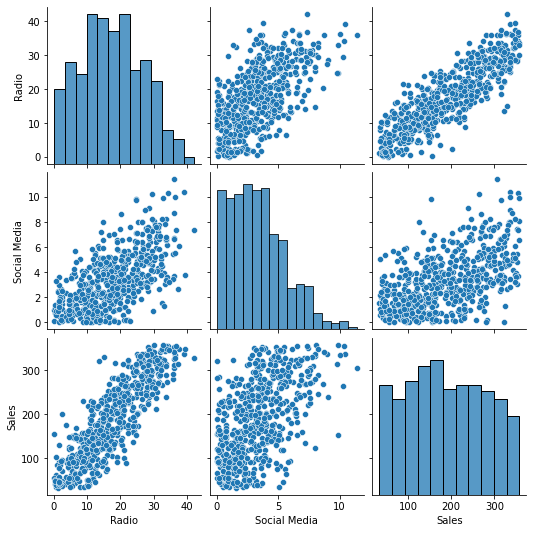

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



Radio and social media. Some variables are excluded from the preceding plot because they are categorical variables.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 
tv_sales = data.groupby('TV')['Sales'].mean()
print(tv_sales)


# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 
influencer_sales = data[['Influencer', 'Sales']]
influencer_sales = influencer_sales.groupby('Influencer')['Sales'].mean()
print(influencer_sales)


TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



Influencer variable seems to have little variablility in Sales average. TV variable, however, has large impact on Sales average with 'High' having larger averages.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data.isna().value_counts()
data = data.dropna(axis=0)
data.isna().value_counts()



TV     Radio  Social Media  Influencer  Sales
False  False  False         False       False    572
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 
data.head()
data['SocialMedia'] = data['Social Media']
data = data.drop('Social Media', axis=1)
data.head()



,TV,Radio,Influencer,Sales,SocialMedia
0,Low,3.518070,Micro,55.261284,2.293790
1,Low,7.756876,Mega,67.574904,2.572287
2,High,20.348988,Micro,272.250108,1.227180
3,Medium,20.108487,Mega,195.102176,2.728374
4,High,31.653200,Nano,273.960377,7.776978


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [59]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = 'Sales ~ Radio + C(TV)'

# Create an OLS model.

### YOUR CODE HERE ### 
ols_model = ols(formula=ols_formula, data=data)



# Fit the model.

### YOUR CODE HERE ### 
trained_model = ols_model.fit() # "training" the data. No train/test split yet.


# Save the results summary.

### YOUR CODE HERE ### 
results = trained_model.summary()


# Display the model results.

### YOUR CODE HERE ### 
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        15:16:23   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



We chose TV because of linearity with Sales and chose TV categorical variable because Sales means show they had a large difference with the High category having 3x Sales than that of Low according to average in sample).

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

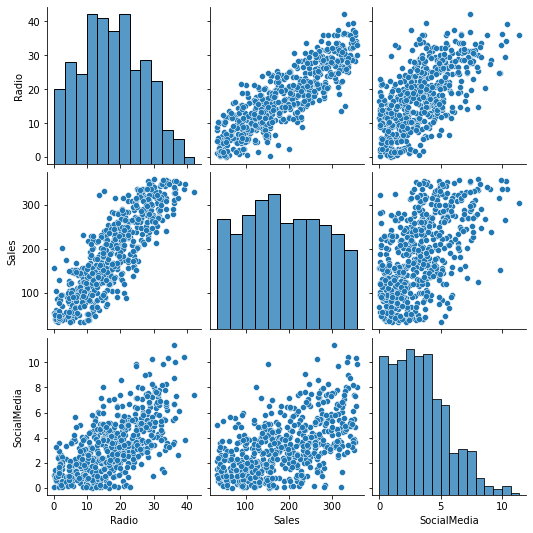

In [60]:
# Create a scatterplot for each independent variable and the dependent variable.
# (pairplot)

### YOUR CODE HERE ### 
sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


After another look, we decide NOT to include SocialMedia variable but with some hesitancy since it could be linear. So it will be removed from the original model calculations.

Otherwise, linearity assumption is conservatively met with SocialMedia variable removed.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

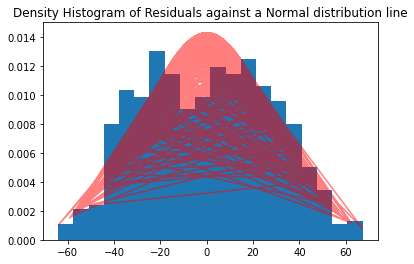

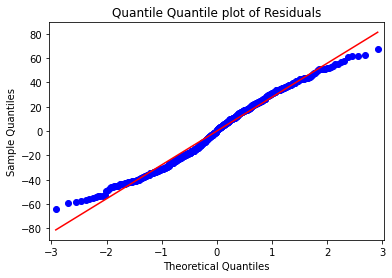

In [61]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = trained_model.resid


# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
plt.hist(residuals, density=True, bins=20)
plt.title('Density Histogram of Residuals against a Normal distribution line')

plt.plot(residuals, norm.pdf(residuals, residuals.mean(), residuals.std()), color='red', alpha=.5) # center showing 
#
plt.show()



# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ###
sm.qqplot(residuals, line='s')
plt.title('Quantile Quantile plot of Residuals')
plt.show()




In [62]:
trained_model.resid.std()

27.844478573016577

### NOTE: 1st standard devations show some deviance from normal distribution graph. (fig 1)
### NOTE: Emphasized again as slight curved line in qqplot (fig 2)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



There's a slight curve but still meets our linearity assumption

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

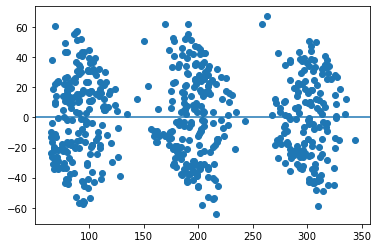

In [91]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
plt.scatter(trained_model.fittedvalues, trained_model.resid)
# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
plt.axhline(0)
plt.show()



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




[Write your response here. Double-click (or enter) to edit.]

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

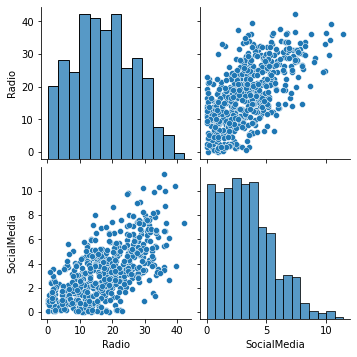

In [70]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data[['Radio', 'SocialMedia']])
plt.show()



#### NOTE: Since we see some collinearity between Radio and SocialMedia, we removed SocialMedia variable from the OLS equation

In [90]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 
from statsmodels.stats.outliers_influence import variance_inflation_factor
radio_social_data = data[['Radio', 'SocialMedia']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(radio_social_data.values, i) for i in range(radio_social_data.shape[1])]

vif["VIF"]


0    5.170922
1    5.170922
Name: VIF, dtype: float64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?

What Can VIF Tell You?
VIF equal to 1 = variables are not correlated.
VIF between 1 and 5 = variables are moderately correlated.
VIF greater than 5 = variables are highly correlated2.




## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [94]:
# Display the model results summary.

### YOUR CODE HERE ### 
trained_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        15:51:12   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


R-squared is 0.904 and adjusted R-squared is 0.904

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [95]:
# Display the model results summary.

### YOUR CODE HERE ### 
trained_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        15:51:50   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



##### Intercept = 218.5261
#####  C(TV)[T.Low] = -154.2971
<h5><bold> C(TV)[T.Medium] = -75.3120 </bold></h5>

##### Radio = 2.9669

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



## Sales = 218.5261 + -154.2971 * T_Low + -75.3120 * T_Medium +  2.9669(X_Radio) 

#### NOTE: We don't include T_High since we can infer T_High from T_Low and T_Medium (Google: Categorical variables and referrence variables in machine learning. Explained by the one-hot encoding and using binary variables to indicate each category.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



<h5> The coefficient estimates are statistically significant since the P-value for each is less than 0.05 confidence level.</h5>

**Question:** Why is it important to interpret the beta coefficients?



<h5> It's important to interpret beta coefficients because they represent estimated rate of growth of linear graph </h5>

**Question:** What are you interested in exploring based on your model?



I'm interested in exploring maximization of Sales with different TV types and Radio. In other words, I want to find different thresholds for TV and Radio so that we can calculate for maximum sales. Is Low TV better for medium amount of Radio sales? What about next year? Is High TV better for lowest investment of Radio investment? etc. etc.

**Question:** Do you think your model could be improved? Why or why not? How?

Yes. We can find out why it's not normal graph. Or get more data. Or use a more complex model with more variables or different calculation types.

## Conclusion

**What are the key takeaways from this lab?**

We learned about VIF variance inflation factor which can be used to calculate multicollinearity within a multiple regression model.
- from statsmodels.stats.outliers_influence import variance_inflation_factor
- vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

Reinforced our other 4 criteria for multiple linear regression:
- Linearity 
    - Had to remove SocialMedia variable out of abundance of caution. It was only moderately linear.
- Independent observations
    - Had to remove SocialMedia variable because it had linear relationship with Radio investments. We chose Radio since it had stronger linearity.
- Normality
    - Only approximately normal. We can never achieve perfect normality.
- Homoscedasticity
    - We observed that homoscedasticity can be achieved even when there's horizontal difference in scatter as long as the scatter is even.
    
- (5th is no multicollinearity)

**What results can be presented from this lab?**

- SocialMedia variable removed because it does not follow 5 criteria for multiple linear regression.
- We see three categories in TV with great amount of changes in Sales
- Radio investments have strong linear relationship with Sales.
- Radio and TV have no relation with each other but Radio and SocialMedia has linear correlation.


**How would you frame your findings to external stakeholders?**

- As we invest more in Radio, we must keep track of TV category in order to see its influence on Sales.
- The SocialMedia variable currently has no merit in our estimates and models. We know that SocialMedia variable has a positive correleation with sales but that's it.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.